# SI 370: Homework 3: Speed Dating

The background material and motivation for this assignment is based on work by Anna Shen on a dataset provided by Anna Montoya from the Kaggle Team.

### About the data (quoted from Anna Shen):
* Data was gathered from 552 participants in experimental speed dating events from 2002-2004. 
* During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 
* At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: 
  * Attractiveness
  * Sincerity
  * Intelligence
  * Fun
  * Ambition
  * Shared Interests.
* The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: 
  * demographics
  * dating habits
  * self-perception across key attributes
  * beliefs on what others find valuable in a mate
  * lifestyle information

See the speed-dating-data-key.doc for data dictionary and question key.

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pd.options.display.max_rows = 1000 #handy for showing truncated results


In [11]:
dating = pd.read_csv('data/speed-dating-experiment/Speed Dating Data.csv',encoding='ISO-8859-1')

In [12]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [13]:
dating.iloc[0]

iid                 1
id                  1
gender              0
idg                 1
condtn              1
wave                1
round              10
position            7
positin1          NaN
order               4
partner             1
pid                11
match               0
int_corr         0.14
samerace            0
age_o              27
race_o              2
pf_o_att           35
pf_o_sin           20
pf_o_int           20
pf_o_fun           20
pf_o_amb            0
pf_o_sha            5
dec_o               0
attr_o              6
sinc_o              8
intel_o             8
fun_o               8
amb_o               8
shar_o              6
like_o              7
prob_o              4
met_o               2
age                21
field             Law
field_cd            1
undergra          NaN
mn_sat            NaN
tuition           NaN
race                4
imprace             2
imprelig            4
from          Chicago
zipcode        60,521
income      69,487.00
goal      

Let's drop a bunch of columns so we're left with only the relevant ones.  You might choose to incorporate additional columns to help you answer the questions but the following reduction yields a dataset that will allow you to adequately answer the questions below.


In [72]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

dating_narrowed = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating.iloc[:, 9],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

### Q1: Describe the distribution of the ages of the participants

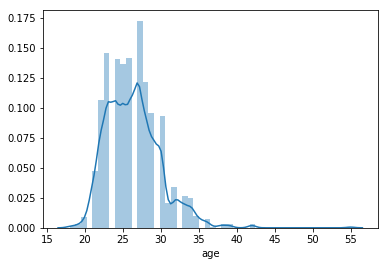

In [70]:
sns.distplot(dating_narrowed.age.dropna())

In [30]:
dating.age.describe()

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

### Q2: What proportion of speed daters found a match?

In [31]:
matches = pd.crosstab(index=dating['match'],columns="count")

In [32]:
matches

col_0,count
match,
0,6998
1,1380


In [33]:
len(dating[dating.match == 1])

1380

In [34]:
len(dating[dating.match == 0])

6998

In [67]:
dating.order.value_counts()

1     551
5     551
2     551
4     551
3     551
6     541
7     514
8     508
9     502
10    474
14    372
13    372
12    372
11    372
15    334
16    304
18    253
17    253
19    178
20    144
21     86
22     44
Name: order, dtype: int64

In [59]:
date4.intel.value_counts()

8.0     1861
7.0     1740
6.0      963
9.0      921
10.0     560
5.0      514
4.0      134
3.0       56
2.0       25
1.0       11
0.0        3
7.5        3
8.5        2
6.5        1
2.5        1
5.5        1
9.5        1
Name: intel, dtype: int64

In [61]:
date4.dec.value_counts()

0    3839
1    2958
Name: dec, dtype: int64

### Q3: What are some interesting patterns of correlations between the variables?

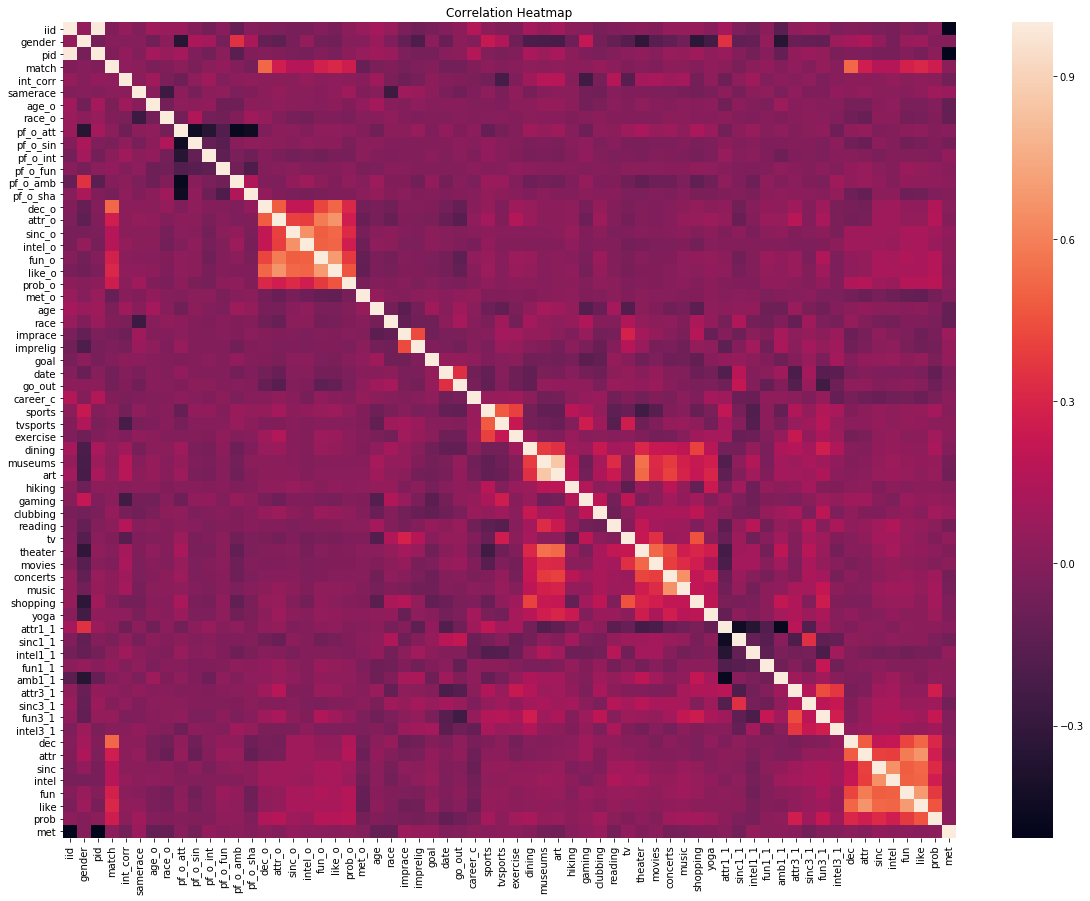

In [35]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_narrowed.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Q4: Do women receive more positive final decisions from the other person (dec_o) than men do?

Hint: chi-squared and mosaic plots might be good choices

In [37]:
import statsmodels.api as sm

In [44]:
# chi-square test
gender_crosstab = pd.crosstab(index=dating_narrowed.gender, columns=dating_narrowed.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

0.0

In [45]:
gender_rslt.pvalue


0.0

In [47]:
gender_crosstab

dec_o,0,1
gender,,
0,2198,1986
1,2665,1529


In [46]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(gender_crosstab)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  103.79970848838241
p-val =  2.238380959241545e-24
degree of freedom =  1
Expected:


,0,1
0,2428.597756,1755.402244
1,2434.402244,1759.597756


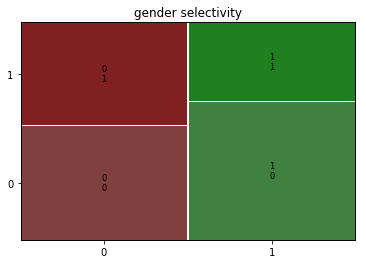

In [49]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(dating_narrowed, ['gender','dec_o'],title='gender selectivity')

### Q5: Between attractiveness, sincerity, intelligence, fun, ambition, and liking, what was the most influential in the final decision (dec)?

Hint: Regression would be a good choice here

In [52]:
date4 = dating_narrowed.dropna()

In [53]:
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1712.
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:16:54   Log-Likelihood:                -3686.4
No. Observations:                6797   AIC:                             7385.
Df Residuals:                    6791   BIC:                             7426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0555      0.004     15.678      0.000       0.049       0.062
sinc          -0.0351      0.004     -8.750      0.000      -0.043      -0.027
intel         -0.0485      0.004    -11.897      0.000      -0.057      -0.041
fun            0.0173      0.004      4.495      0.000       0.010       0.025
like           0.0997      0.004     22.261      0.000       0.091       0.109
int_corr      -0.0366      0.017     -2.210      0.027      -0.069      -0.004
==============================================================================
Omnibus:                     4603.362   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.555
Skew:                           0.072   Prob(JB):                     2.11e-86
Kurtosis:                       1.828   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q6: Does the order in which speed daters meet each other matter in terms of final outcome (matches)?

Hint: ANOVA might be a good choice

Note: It may be better to create a categorical variable based on whether the pair met "early" or "late" than it is to just use the "order" column

In [73]:
from statsmodels.formula.api import ols

In [74]:
dating_lm = ols('dec ~ order', data=dating).fit()
table = sm.stats.anova_lm(dating_lm, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
order,2.071759,1.0,8.511876,0.003538
Residual,2038.687372,8376.0,NaN,NaN


In [64]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [68]:
res2 = pairwise_tukeyhsd(dating['dec'], dating['order'])
res2.summary()

group1,group2,meandiff,lower,upper,reject
1,2,-0.1053,-0.2121,0.0015,False
1,3,-0.078,-0.1848,0.0288,False
1,4,-0.0526,-0.1594,0.0542,False
1,5,-0.0762,-0.183,0.0306,False
1,6,-0.0573,-0.1646,0.05,False
1,7,-0.0828,-0.1915,0.026,False
1,8,-0.0896,-0.1987,0.0194,False
1,9,-0.0549,-0.1642,0.0545,False
1,10,-0.0793,-0.1903,0.0318,False
1,11,-0.0986,-0.2175,0.0204,False
